#  House Price Regression  Project

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion
read the training dataset

In [2]:
import pandas as pd

df = pd.read_csv("training_set.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 # Target Feature - SalePrice

 # Step 2 - Perfom basic data quality checks

In [3]:
df.shape

(1460, 81)

In [4]:
m = df.isna().sum()
m[m > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# df.duplicated().sum()

In [7]:
X = df.drop(columns=["Id", "SalePrice"])
Y = df[["SalePrice"]]

In [8]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


<Axes: xlabel='SalePrice', ylabel='Count'>

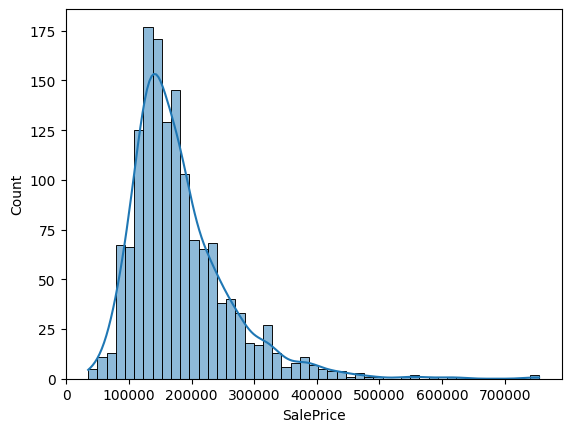

In [10]:
import seaborn as sns

sns.histplot(data=Y, x="SalePrice", kde=True)

 # Step 4 - Feature Selection with preprocessing

Categorical feature - Ordinal Encoder

In [11]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [12]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe1 = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [16]:
cat_pipe1 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NotAvail"), OrdinalEncoder()
)

In [17]:
pre1 = ColumnTransformer([("num", num_pipe1, con), ("cat", cat_pipe1, cat)]).set_output(
    transform="pandas"
)

In [18]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

lr = LinearRegression()
sel = SequentialFeatureSelector(lr, n_features_to_select="auto", direction="backward")
sel.fit(X_pre, Y)
imp_cols = sel.get_feature_names_out()
print(imp_cols)

['num__MSSubClass' 'num__LotArea' 'num__OverallQual' 'num__OverallCond'
 'num__YearBuilt' 'num__MasVnrArea' 'num__BsmtFinSF1' 'num__BsmtFinSF2'
 'num__BsmtUnfSF' 'num__TotalBsmtSF' 'num__1stFlrSF' 'num__2ndFlrSF'
 'num__LowQualFinSF' 'num__GrLivArea' 'num__BsmtFullBath'
 'num__Fireplaces' 'num__GarageCars' 'num__WoodDeckSF' 'num__ScreenPorch'
 'num__PoolArea' 'num__YrSold' 'cat__LandContour' 'cat__Utilities'
 'cat__Neighborhood' 'cat__BldgType' 'cat__HouseStyle' 'cat__RoofMatl'
 'cat__Exterior1st' 'cat__MasVnrType' 'cat__ExterQual' 'cat__BsmtQual'
 'cat__BsmtCond' 'cat__BsmtExposure' 'cat__HeatingQC' 'cat__KitchenQual'
 'cat__Functional' 'cat__FireplaceQu' 'cat__GarageFinish'
 'cat__GarageCond' 'cat__MiscFeature']


In [20]:
len(imp_cols)

40

In [21]:
# Getting orignal column names
sel_cols = [col.split("__")[-1] for col in imp_cols]
print(sel_cols)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'YrSold', 'LandContour', 'Utilities', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageCond', 'MiscFeature']


In [22]:
# Get selected dataframe
X_sel = X[sel_cols]
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageCond,MiscFeature
0,60,8450,7,5,2003,196.0,706,0,150,856,...,Gd,TA,No,Ex,Gd,Typ,NaN,RFn,TA,NaN
1,20,9600,6,8,1976,0.0,978,0,284,1262,...,Gd,TA,Gd,Ex,TA,Typ,TA,RFn,TA,NaN
2,60,11250,7,5,2001,162.0,486,0,434,920,...,Gd,TA,Mn,Ex,Gd,Typ,TA,RFn,TA,NaN
3,70,9550,7,5,1915,0.0,216,0,540,756,...,TA,Gd,No,Gd,Gd,Typ,Gd,Unf,TA,NaN
4,60,14260,8,5,2000,350.0,655,0,490,1145,...,Gd,TA,Av,Ex,Gd,Typ,TA,RFn,TA,NaN


 # Feature Selection is Done

 # Step 5 - Apply final preprocessing on Selected featuers

OnehotEncoder

In [23]:
cat_sel = list(X_sel.columns[X_sel.dtypes == "object"])
con_sel = list(X_sel.columns[X_sel.dtypes != "object"])

In [24]:
cat_sel

['LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCond',
 'MiscFeature']

In [25]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
num_pipe2 = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [28]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NotAvail"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
)

In [29]:
pre_final = ColumnTransformer(
    [("num", num_pipe2, con_sel), ("cat", cat_pipe2, cat_sel)]
).set_output(transform="pandas")

In [30]:
X_sel_pre = pre_final.fit_transform(X_sel)
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageFinish_Unf,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_NotAvail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_NotAvail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
pre_final

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


# Step 6 - Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_sel_pre, Y, test_size=0.2, random_state=21
)

In [33]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageFinish_Unf,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_NotAvail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_NotAvail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
710,-0.636078,-0.640101,-2.241782,0.381743,-1.201217,-0.570750,-0.973018,-0.288653,-0.672923,-1.795509,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1098,-0.163109,-0.452686,-1.518467,0.381743,-1.168096,-0.570750,0.500854,-0.288653,-1.284176,-0.878862,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1286,-0.872563,-0.072844,-0.071836,-0.517200,-0.273836,1.925521,0.274948,0.213629,0.250749,0.616959,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
992,0.073375,-0.075851,-0.071836,2.179628,-0.240715,1.311140,0.202570,0.436865,-0.901577,-0.536830,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
631,1.492282,-0.593999,1.374795,-0.517200,1.150356,0.027027,-0.920380,-0.288653,2.179592,1.132288,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [34]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


In [35]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageFinish_Unf,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_NotAvail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_NotAvail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
880,-0.872563,-0.350058,-0.795151,-0.517200,1.117235,-0.570750,1.176379,-0.288653,-1.035147,0.074268,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
605,0.073375,0.309002,0.651479,0.381743,-0.207594,0.403405,0.022723,-0.288653,-0.573311,-0.659961,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1166,-0.872563,-0.004192,1.374795,-0.517200,1.216598,-0.172232,-0.973018,-0.288653,2.550871,1.451518,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
216,-0.872563,-0.207142,0.651479,-0.517200,1.084115,0.901552,1.101808,-0.288653,-0.174865,0.863222,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
970,-0.163109,0.028380,-1.518467,-1.416142,-0.737526,-0.570750,-0.973018,-0.288653,0.345832,-0.769412,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [37]:
xtrain.shape

(1168, 129)

In [38]:
xtest.shape

(292, 129)

 # Step 7 - Build the model

1. LinearRegression 
2. Ridge
3. Lasso

# a. Linear Regression

In [39]:
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
# R2 score in train
model1.score(xtrain, ytrain)

0.9254855117253302

In [41]:
# R2 score in test
model1.score(xtest, ytest)

0.818857516318992

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model1, xtrain, ytrain, cv=5, scoring="r2")
scores

array([0.5915387 , 0.75637971, 0.90847201, 0.86662213, 0.0815853 ])

In [43]:
scores.mean()

np.float64(0.6409195694675844)

# b. Ridge (L2 Reguarization)

In [44]:
import numpy as np

params = {"alpha": np.arange(start=1, stop=50, step=1)}

In [45]:
params

{'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge1 = Ridge()
gscv_ridge = GridSearchCV(ridge1, param_grid=params, cv=5, scoring="r2")
gscv_ridge.fit(xtrain, ytrain)

,estimator,Ridge()
,param_grid,"{'alpha': array([ 1, 2..., 47, 48, 49])}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.int64(11)


In [47]:
gscv_ridge.best_params_

{'alpha': np.int64(11)}

In [48]:
gscv_ridge.best_score_

np.float64(0.8308208209925162)

In [49]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

,alpha,np.int64(11)
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [50]:
# R2 score on train
best_ridge.score(xtrain, ytrain)

0.8841295846522442

 # c. Lasso Model (L1 Regularization)

In [51]:
params2 = {"alpha": np.arange(start=50, stop=1000, step=50)}

In [52]:
params2

{'alpha': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
        700, 750, 800, 850, 900, 950])}

In [53]:
from sklearn.linear_model import Lasso

lasso1 = Lasso()
gscv_lasso = GridSearchCV(lasso1, param_grid=params2, cv=5, scoring="r2")
gscv_lasso.fit(xtrain, ytrain)

,estimator,Lasso()
,param_grid,"{'alpha': array([ 50, 1...50, 900, 950])}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.int64(150)


In [54]:
gscv_lasso.best_params_

{'alpha': np.int64(150)}

In [55]:
gscv_lasso.best_score_

np.float64(0.8294962774014669)

In [56]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

,alpha,np.int64(150)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [57]:
# R2 score in train
best_lasso.score(xtrain, ytrain)

0.8787746340269247

In [58]:
# R2 score in test
best_lasso.score(xtest, ytest)

0.8345444132863319

# Use Ridge model for out of sample data as it has highest cross validation score of 0.8308

# Step 8 - Out of Sample Prediction

In [59]:
xnew = pd.read_csv("testing_set.csv")
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
m1 = xnew.isna().sum()
m1[m1 > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [61]:
pre_final

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [62]:
xnew_pre = pre_final.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageFinish_Unf,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_NotAvail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_NotAvail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.053428,0.604293,-0.672923,-0.400017,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,1.051363,-0.288653,-0.365032,0.619239,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.396190,-0.288653,1.018211,0.507509,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


Predict results

In [63]:
preds = best_ridge.predict(xnew_pre)
preds

array([119511.81007356, 144675.92674672, 168817.38269279, ...,
       176631.41884304,  99951.04842247, 225411.51182462], shape=(1459,))

In [64]:
res = xnew[["Id"]]
res

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [65]:
res["SalePrice"] = preds.round(2)
res

,Id,SalePrice
0,1461,119511.81
1,1462,144675.93
2,1463,168817.38
3,1464,182887.19
4,1465,198139.05
...,...,...
1454,2915,81386.59
1455,2916,75892.43
1456,2917,176631.42
1457,2918,99951.05


<Axes: xlabel='SalePrice', ylabel='Count'>

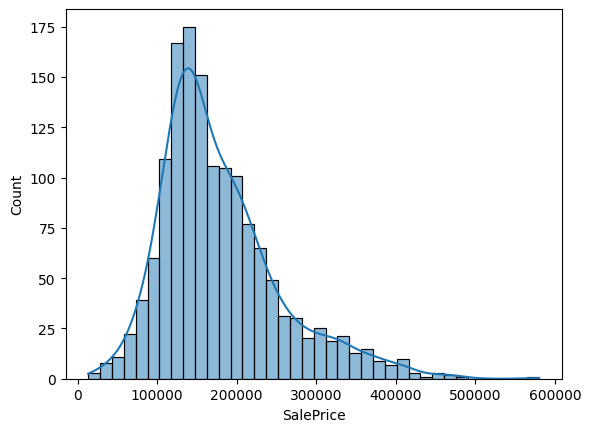

In [66]:
sns.histplot(data=res, x="SalePrice", kde=True)

In [67]:
res.to_csv("RidgeResults.csv", index=False)

# Step 9 - Save the preprocessor and model object

In [68]:
pre_final

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [69]:
best_ridge

,alpha,np.int64(11)
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [70]:
import joblib

joblib.dump(pre_final, "pre.joblib")

['pre.joblib']

In [71]:
joblib.dump(best_ridge, "price_ridge.joblib")

['price_ridge.joblib']

 # Load from files

In [72]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [73]:
m = joblib.load("price_ridge.joblib")
m

,alpha,np.int64(11)
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [74]:
m.score(xtrain, ytrain)

0.8841295846522442

In [75]:
m.score(xtest, ytest)

0.8346004790063892